In [1]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainData = pd.read_csv("Data/train.csv")
testData = pd.read_csv("Data/test.csv")

In [142]:
trainDataSmall = trainData[trainData.columns[9900:10002]]
testDataSmall = testData[testData.columns[9900:10001]]
display(testDataSmall)

,Gene 9901,Gene 9902,Gene 9903,Gene 9904,Gene 9905,Gene 9906,Gene 9907,Gene 9908,Gene 9909,Gene 9910,...,Gene 9992,Gene 9993,Gene 9994,Gene 9995,Gene 9996,Gene 9997,Gene 9998,Gene 9999,Gene 10000,Id
0,117.0,100.0,31.0,1178.0,178.0,287.0,209.0,49.0,202.0,21679.0,...,49092.0,261.0,88923.0,30878.0,83.0,175.0,13921.0,3062.0,2084.0,2387
1,50.0,144.0,47.0,2108.0,414.0,413.0,294.0,79.0,219.0,21603.0,...,89657.0,159.0,65564.0,34558.0,18.0,134.0,18307.0,5790.0,1361.0,4623
2,115.0,150.0,38.0,1413.0,449.0,256.0,209.0,106.0,225.0,20720.0,...,74253.0,147.0,66750.0,21245.0,93.0,160.0,18365.0,4558.0,581.0,410
3,131.0,91.0,60.0,1245.0,179.0,282.0,281.0,88.0,225.0,14793.0,...,76284.0,172.0,69003.0,38410.0,141.0,210.0,27258.0,3036.0,1086.0,2708
4,112.0,126.0,51.0,1865.0,307.0,232.0,157.0,88.0,198.0,16155.0,...,81513.0,190.0,33308.0,27677.0,88.0,193.0,18550.0,1030.0,942.0,3328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,147.0,221.0,53.0,1719.0,215.0,453.0,251.0,74.0,195.0,18203.0,...,73965.0,85.0,76114.0,44886.0,63.0,232.0,17724.0,3789.0,1478.0,4322
796,54.0,151.0,38.0,1581.0,457.0,500.0,232.0,33.0,231.0,28630.0,...,51877.0,176.0,46539.0,31844.0,89.0,197.0,24673.0,3177.0,1832.0,262
797,92.0,142.0,54.0,1173.0,349.0,205.0,184.0,90.0,157.0,12580.0,...,95446.0,219.0,77807.0,40548.0,50.0,166.0,24336.0,2713.0,1853.0,1843
798,131.0,166.0,64.0,1552.0,490.0,356.0,283.0,82.0,235.0,25114.0,...,95648.0,247.0,54852.0,24313.0,86.0,105.0,16894.0,3360.0,1567.0,3910


There are 25714 NaNs
Class outcome 0 accounts for 17.6%
Class outcome 1 accounts for 20.6%
Class outcome 2 accounts for 25.0%
Class outcome 3 accounts for 36.7%


,count,mean,std,min,25%,50%,75%,max
Gene 9901,3948.0,97.737082,29.110951,5.0,78.00,97.0,117.00,204.0
Gene 9902,3923.0,137.020138,36.164821,0.0,113.00,137.0,161.00,277.0
Gene 9903,3965.0,50.554351,14.969289,0.0,41.00,51.0,61.00,105.0
Gene 9904,3971.0,1532.877865,432.654137,69.0,1241.00,1533.0,1830.00,3112.0
Gene 9905,3947.0,351.287814,95.014907,1.0,288.00,352.0,418.00,660.0
...,...,...,...,...,...,...,...,...
Gene 9998,3941.0,19411.640700,5842.660449,0.0,15595.00,19371.0,23283.00,42864.0
Gene 9999,3930.0,3491.739695,960.807670,123.0,2843.50,3486.5,4139.75,7215.0
Gene 10000,3956.0,1506.433519,455.795727,46.0,1196.00,1506.0,1813.00,3316.0
Outcome,4200.0,1.808333,1.114616,0.0,1.00,2.0,3.00,3.0


<AxesSubplot:xlabel='count', ylabel='max'>

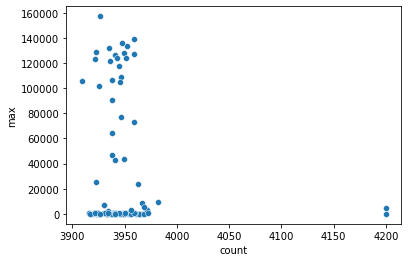

In [128]:
# exercise 2

print(f"There are {trainDataSmall.isna().sum().sum()} NaNs")
outcomes = trainDataSmall["Outcome"]
for i in range(4):
   print(f"Class outcome {i} accounts for {(outcomes == i).sum()/len(trainDataSmall)*100:.1f}%")
summary = trainDataSmall.describe()
display(summary.T)
sns.scatterplot(data = summary.T, x = "count", y = "max")

In [144]:
# exercise 3
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

trainDataClass = trainDataSmall["Outcome"]
trainDataIds = trainDataSmall["Id"]
trainDataFeatures = trainDataSmall.drop(columns = ["Outcome", "Id"])

testDataIds = testDataSmall["Id"]
testDataFeatures = testDataSmall.drop(columns = ["Id"])

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(trainDataFeatures, trainDataClass, trainDataIds, test_size = .2, train_size = .8, random_state=24)

e3_model = Pipeline([
    ("Scaling", StandardScaler()), 
    ("Imputing", KNNImputer()), 
    ("Regression", LogisticRegression())], 
    verbose = True)

e3_model.fit(X_train, y_train)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(id_test, columns=["Id"])
e3_outcome = pd.DataFrame(e3_model.predict(X_test), columns=["Outcome"])
ids.index = range(len(e3_outcome))
e3_outcome = pd.concat([ids, e3_outcome], axis=1)
display(e3_outcome)
e3_outcome.to_csv("e3_outcome.csv", index=False)


[Pipeline] ........... (step 1 of 3) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing Imputing, total=   7.3s
[Pipeline] ........ (step 3 of 3) Processing Regression, total=   0.1s


,Id,Outcome
0,3333,0
1,3989,2
2,4597,3
3,739,3
4,588,3
...,...,...
835,4425,3
836,241,2
837,2906,3
838,3231,3


In [134]:
# exercise 4
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

e4_model = Pipeline([
    ("Scaling", StandardScaler()), 
    ("Imputing", KNNImputer()),
    ("PCA", PCA(n_components = 50)),
    ("Regression", LogisticRegression())], 
    verbose = True)

cross_val = cross_validate(e4_model, trainDataFeatures, trainDataClass, cv = 10)
display(cross_val)

[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=   6.0s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.1s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.0s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=   5.4s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.0s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=   5.1s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.0s
[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=   6.0s
[Pipel

{'fit_time': array([6.22455096, 5.52130198, 5.21666622, 6.13474393, 5.80825496,
        5.19573116, 5.16437006, 7.69400215, 6.78755713, 5.43778014]),
 'score_time': array([0.63302898, 0.66757083, 0.64974189, 0.62254095, 0.69828105,
        0.6373477 , 0.79085398, 1.10968685, 0.86982083, 0.66149402]),
 'test_score': array([0.35238095, 0.3452381 , 0.33809524, 0.36904762, 0.35      ,
        0.36190476, 0.35238095, 0.35238095, 0.3452381 , 0.37142857])}

In [145]:
e4_model.fit(trainDataFeatures, trainDataClass)

# get model predictions on test set and output to .csv
ids = pd.DataFrame(id_test, columns=["Id"])
e4_outcome = pd.DataFrame(e4_model.predict(X_test), columns=["Outcome"])
ids.index = range(len(e3_outcome))
e4_outcome = pd.concat([ids, e4_outcome], axis=1)
display(e4_outcome)
e4_outcome.to_csv("e4_outcome.csv", index=False)





[Pipeline] ........... (step 1 of 4) Processing Scaling, total=   0.0s
[Pipeline] .......... (step 2 of 4) Processing Imputing, total=   6.4s
[Pipeline] ............... (step 3 of 4) Processing PCA, total=   0.1s
[Pipeline] ........ (step 4 of 4) Processing Regression, total=   0.0s


,Id,Outcome
0,3333,3
1,3989,2
2,4597,3
3,739,3
4,588,3
...,...,...
835,4425,3
836,241,2
837,2906,3
838,3231,3


In [171]:
expVar = e4_model.named_steps["PCA"].explained_variance_
print(f"The first PC explains {expVar[0]:.3f} variance.")
print(f"The second PC explains {expVar[1]:.3f} variance.")
e4_model.named_steps["PCA"].explained_variance_ratio_
e4_model.named_steps["PCA"].explained_variance_ratio_

The first PC explains 1.601 variance.
The second PC explains 1.500 variance.


array([0.01683338, 0.01576761, 0.015238  , 0.01456136, 0.01435486,
       0.01368621, 0.01349155, 0.01340372, 0.01285108, 0.01274455,
       0.01262398, 0.01237925, 0.01223298, 0.01212797, 0.01205077,
       0.01197517, 0.0118539 , 0.01178279, 0.01169207, 0.01163571,
       0.01154742, 0.01148034, 0.01136811, 0.01133385, 0.01117934,
       0.01103116, 0.0110014 , 0.01091149, 0.01089296, 0.0108491 ,
       0.01071832, 0.01064329, 0.01058697, 0.01049773, 0.01048528,
       0.01040119, 0.01030258, 0.01021837, 0.01014014, 0.01011249,
       0.01000342, 0.009931  , 0.00985858, 0.00974284, 0.00971836,
       0.00966004, 0.00959667, 0.00948003, 0.00933416, 0.00927762])